In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [3]:
df_cleaned = pd.read_csv('df_withmissing.csv')
df_cleaned['Year'] = df_cleaned['Year'].astype('object')
df_cleaned.dropna(inplace=True)
df_cleaned.shape

(2768, 18)

In [4]:
categorical_vars = ["Entity", "Year"]
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")
# apply the one hot encoder logic 
encoder_vars_array = one_hot_encoder.fit_transform(df_cleaned[categorical_vars])

# create object for the feature names using the categorical variables
encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

# create a dataframe to hold the one hot encoded variables
encoder_vars_df = pd.DataFrame(encoder_vars_array, columns = encoder_feature_names)

# concatenate the new dataframe back to the original input variables dataframe
df_cleaned_new = pd.concat([df_cleaned.reset_index(drop=True), encoder_vars_df.reset_index(drop=True)], axis = 1)

# drop the original input 2 and input 3 as it is not needed anymore
df_cleaned_new.drop(categorical_vars, axis = 1, inplace = True)

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
'''
sampled_data = df_cleaned_new.sample(frac=0.7, random_state=42)
target = sampled_data['Value_co2_emissions_kt_by_country']
sampled_data.drop(columns=['Value_co2_emissions_kt_by_country'], inplace=True)
x_train, x_test, y_train, y_test = train_test_split(sampled_data, target, test_size=0.2, random_state=2024, shuffle=True)
y_train.shape
'''
df_cleaned = pd.read_csv('df_withmissing.csv')
df_cleaned['Year'] = df_cleaned['Year'].astype('object')
df_cleaned.dropna(inplace=True)
df_cleaned.shape

(2768, 18)

In [14]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
# Dictionary to store MSE for each kernel
mse_scores = {}
# Loop through the list of kernels, creating, fitting, and evaluating a model for each
for kernel in kernels:
    print(f"Training and evaluating model with '{kernel}' kernel.")
    if kernel == 'linear':
        # Handle the linear case with LinearSVR
        regr = make_pipeline(StandardScaler(), LinearSVR(dual=True, random_state=0, tol=1e-5))
    else:
        # Use SVR for non-linear kernels
        regr = make_pipeline(StandardScaler(), SVR(kernel=kernel, C=1.0, epsilon=0.1))
    
    # Train the model
    regr.fit(x_train, y_train)
    
    # Evaluate the model (Compute MSE)
    y_pred = regr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[kernel] = mse

    print(f"Kernel: {kernel}, Mean Squared Error: {mse}\n")

Training and evaluating model with 'linear' kernel.
Kernel: linear, Mean Squared Error: 499111661474.00726

Training and evaluating model with 'poly' kernel.
Kernel: poly, Mean Squared Error: 496642925868.18506

Training and evaluating model with 'rbf' kernel.
Kernel: rbf, Mean Squared Error: 496650876034.55365

Training and evaluating model with 'sigmoid' kernel.
Kernel: sigmoid, Mean Squared Error: 496645502032.62756



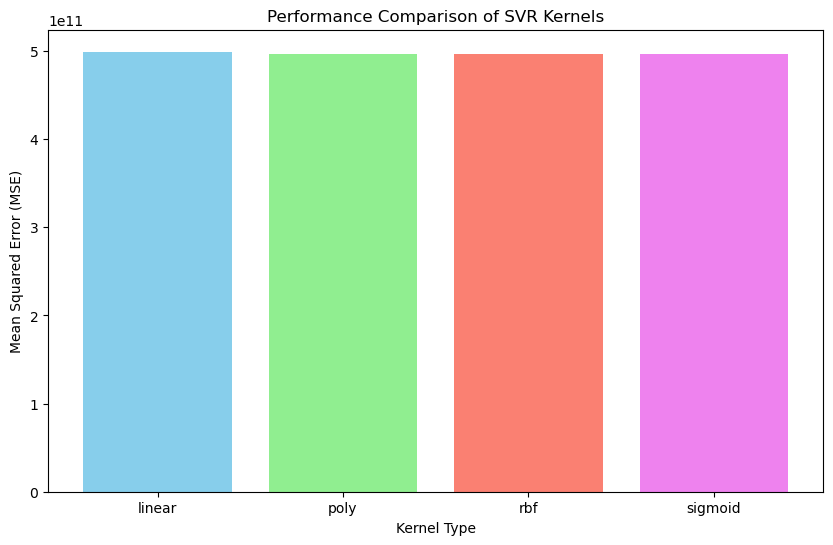

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(mse_scores.keys(), mse_scores.values(), color=['skyblue', 'lightgreen', 'salmon', 'violet'])
plt.xlabel('Kernel Type')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Performance Comparison of SVR Kernels')
plt.xticks(list(mse_scores.keys()))
plt.show()
